In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('synthetic_customer_churn_data.csv')

In [15]:
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Age,Tenure,MonthlyCharges,TotalCharges,InternetService,ContractType,Churn
0,69,68,23.06,1571.14,DSL,One year,0
1,32,66,73.49,4857.87,DSL,Two year,0
2,78,60,70.54,4335.63,Fiber optic,Two year,0
3,38,59,88.54,5213.53,Fiber optic,One year,0
4,41,70,25.91,1829.83,No,Month-to-month,0


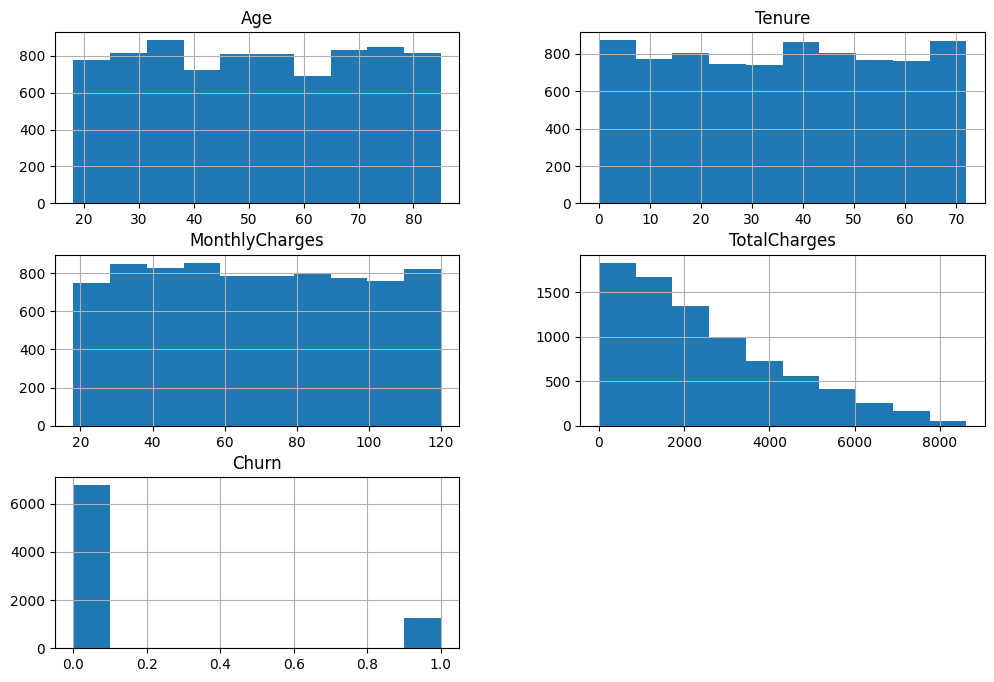

In [9]:
data.hist(figsize=(12,8));

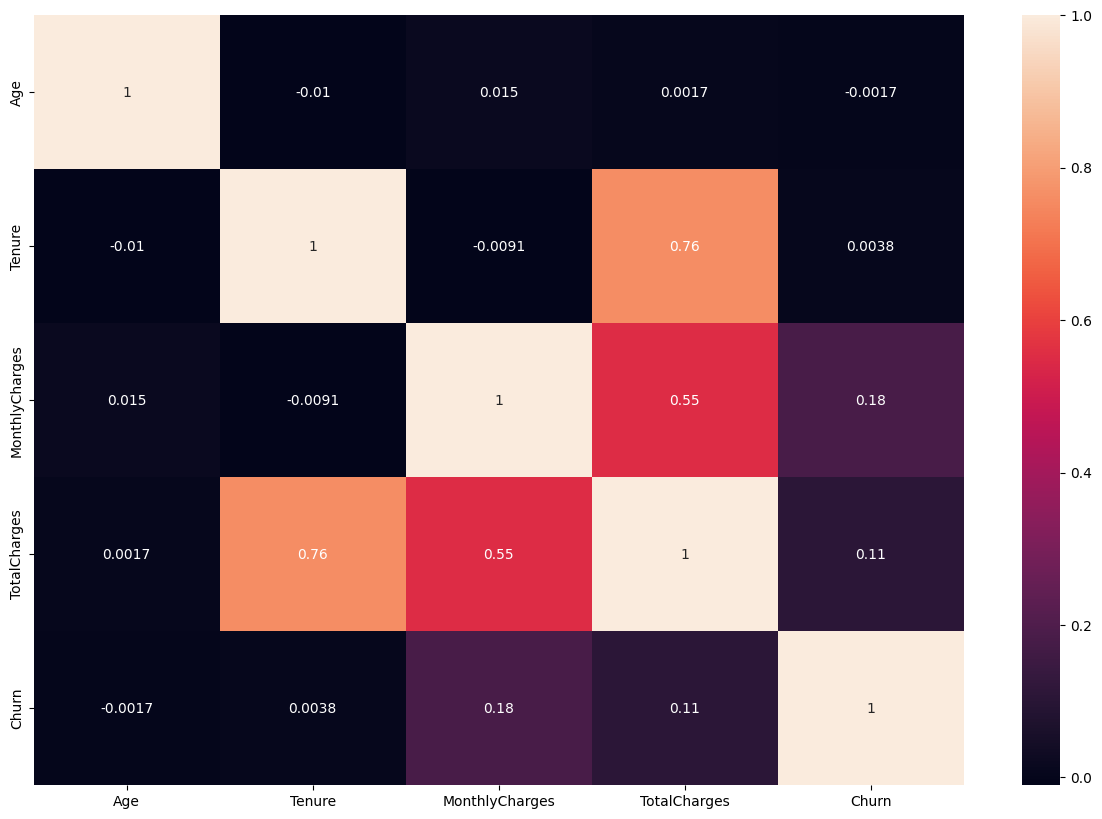

In [ ]:
corr = data.drop(['InternetService'	,'ContractType'], axis=1).corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, ax=ax)
# plt.savefig('./plots/correlation_heatmap.png')
plt.show()

In [22]:
df = pd.get_dummies(data, ['InternetService'	,'ContractType'], dtype=int)
df.head()

,Age,Tenure,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,ContractType_Month-to-month,ContractType_One year,ContractType_Two year
0,69,68,23.06,1571.14,0,1,0,0,0,1,0
1,32,66,73.49,4857.87,0,1,0,0,0,0,1
2,78,60,70.54,4335.63,0,0,1,0,0,0,1
3,38,59,88.54,5213.53,0,0,1,0,0,1,0
4,41,70,25.91,1829.83,0,0,0,1,1,0,0


In [23]:
x = df.drop(['Churn'], axis=1) 
y = df.Churn
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [25]:
lr = LogisticRegression()
lr.fit(x_scaled, y_train)

LogisticRegression()

In [27]:
y_pred = lr.predict(x_scaled_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.856875

In [31]:
report = classification_report(y_test, y_pred)
report

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

'              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.92      1371\n           1       0.00      0.00      0.00       229\n\n    accuracy                           0.86      1600\n   macro avg       0.43      0.50      0.46      1600\nweighted avg       0.73      0.86      0.79      1600\n'

In [41]:
coefficients = lr.coef_
features =  x.columns
feat_imp = pd.Series(coefficients[0], index=features)
feat_imp

Age                            0.018013
Tenure                         0.046222
MonthlyCharges                 0.556834
TotalCharges                  -0.024077
InternetService_DSL            0.016388
InternetService_Fiber optic   -0.015468
InternetService_No             0.000561
ContractType_Month-to-month    0.297092
ContractType_One year         -0.157550
ContractType_Two year         -0.187575
dtype: float64

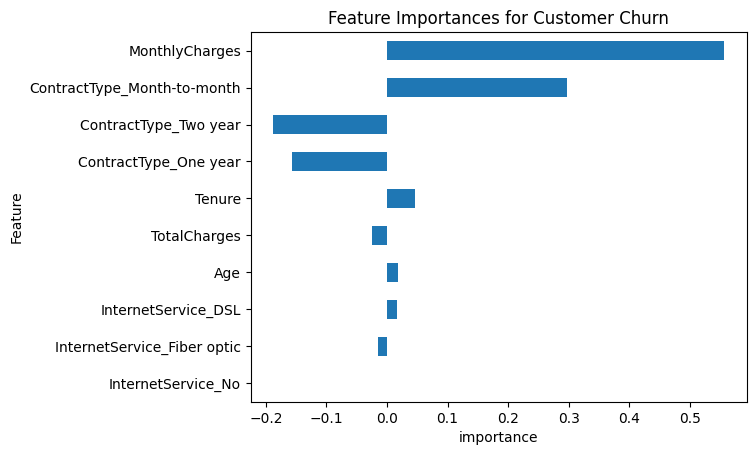

In [43]:
# Build bar chart
feat_imp.sort_values(key=abs).tail(10).plot(kind='barh')


# Label axes
plt.xlabel("importance")
plt.ylabel("Feature")

# Add title
plt.title("Feature Importances for Customer Churn");

From this plot we can see that Monthly charges and ContractType Month-to-month has alot of significance in the predictions

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_scaled, y_train)

DecisionTreeClassifier()

In [45]:
dtc_pred = dtc.predict(x_scaled_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_acc

0.761875

The Decision tree model perform badly relative to the Logistic Regression model